In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [46]:
data=pd.read_csv(r"C:\Users\91770\Documents\kaggle_data\archive (1).zip")

In [47]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [48]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [49]:
#dropping columns which are not required
data.drop(columns=['stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus'],inplace=True)        #droppping unwanted columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   bedrooms   545 non-null    int64
 3   bathrooms  545 non-null    int64
dtypes: int64(4)
memory usage: 17.2 KB


In [50]:
data.isna().sum()

price        0
area         0
bedrooms     0
bathrooms    0
dtype: int64

In [51]:
data.to_csv("clean_data")     

In [52]:
data.head()

,price,area,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1


In [53]:
data.describe()

,price,area,bedrooms,bathrooms
count,5.450000e+02,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239
std,1.870440e+06,2170.141023,0.738064,0.502470
min,1.750000e+06,1650.000000,1.000000,1.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000


<Axes: >

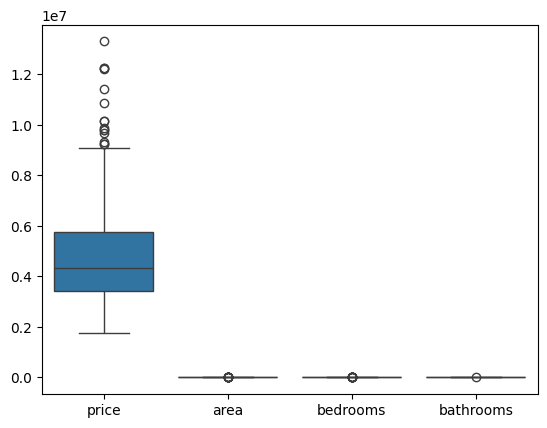

In [54]:
#checking outliers using boxplot
sns.boxplot(data)

In [55]:
#handling Outliers
Q1=np.percentile(data['price'],25,interpolation='midpoint')
Q3=np.percentile(data['price'],75,interpolation='midpoint')
IQR=Q3-Q1

In [56]:
lb=Q1-1.5*IQR    #lowerbound
ub=Q3+1.5*IQR    #upperbound

In [57]:
data=data[(data.price < ub)&(data.price>lb)]

<Axes: >

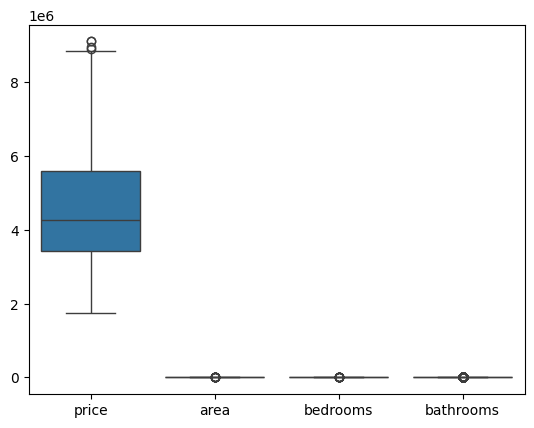

In [58]:
sns.boxplot(data)

In [59]:
data.shape

(530, 4)

In [60]:
#seperating target variable
X=data.drop(columns='price')
y=data['price']

In [61]:
X

,area,bedrooms,bathrooms
15,6000,4,1
16,6600,4,2
17,8500,3,2
18,4600,3,2
19,6420,3,2
...,...,...,...
540,3000,2,1
541,2400,3,1
542,3620,2,1
543,2910,3,1


In [62]:
y

15     9100000
16     9100000
17     8960000
18     8890000
19     8855000
        ...   
540    1820000
541    1767150
542    1750000
543    1750000
544    1750000
Name: price, Length: 530, dtype: int64

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [64]:
X[:]=scaler.transform(X)    #to store data in dataframe

In [65]:
X

,area,bedrooms,bathrooms
15,0.311828,0.6,0.0
16,0.354839,0.6,0.5
17,0.491039,0.4,0.5
18,0.211470,0.4,0.5
19,0.341935,0.4,0.5
...,...,...,...
540,0.096774,0.2,0.0
541,0.053763,0.4,0.0
542,0.141219,0.2,0.0
543,0.090323,0.4,0.0


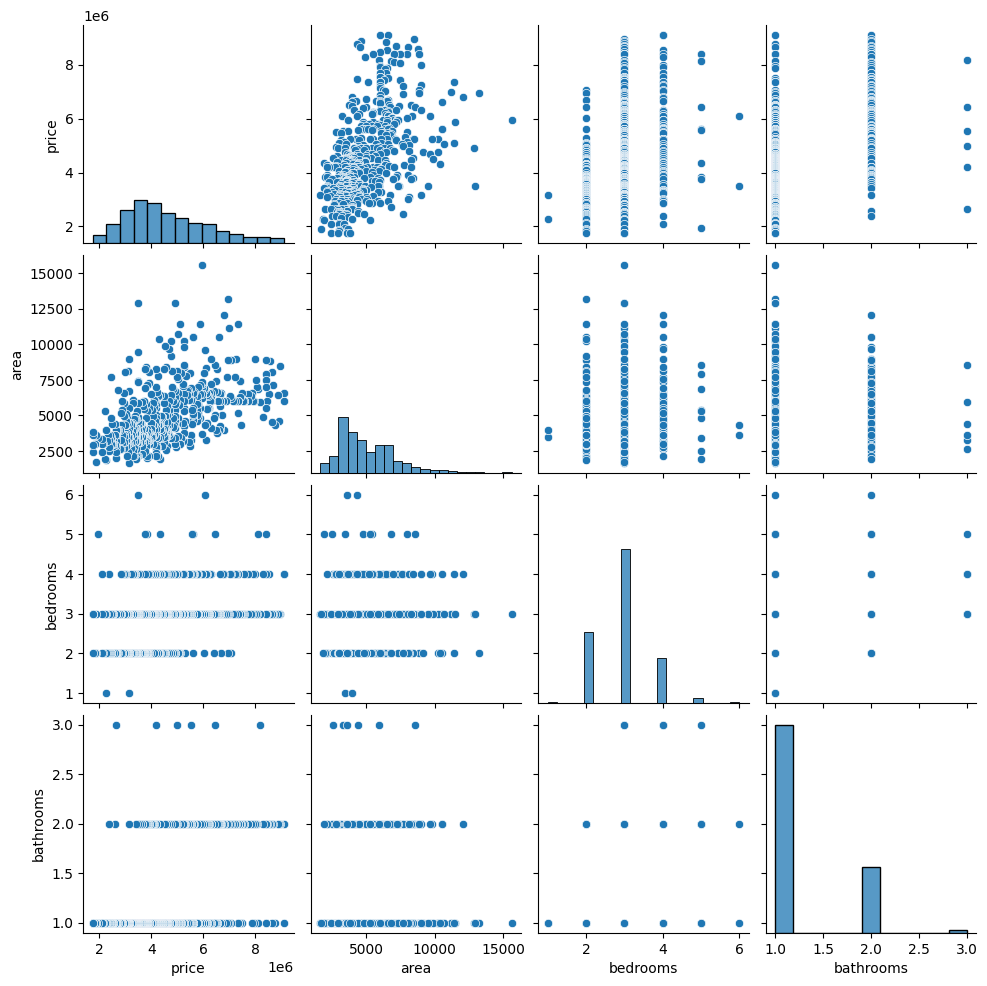

In [66]:
sns.pairplot(data)

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [68]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((424, 3), (106, 3), (424,), (106,))

In [69]:
#implementing linear regression model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [70]:
y_pred=model.predict(X_test)

In [71]:
y_test[:5]

155    5530000
413    3430000
21     8680000
349    3780000
337    3920000
Name: price, dtype: int64

In [72]:
y_pred[:5]

array([5808737.63882152, 4502322.17895205, 6140850.48464375,
       4213329.59715558, 4897463.44173101])

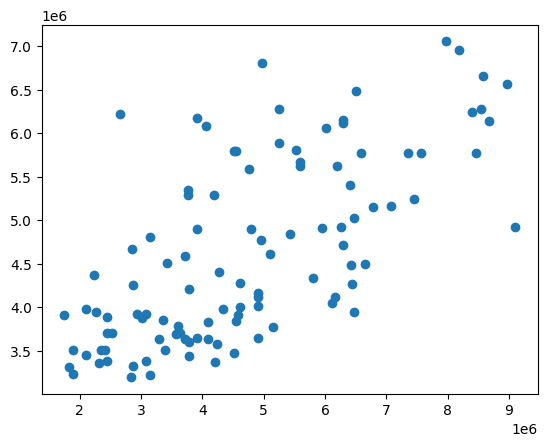

In [73]:
plt.scatter(y_test,y_pred)

<Axes: xlabel='price', ylabel='Density'>

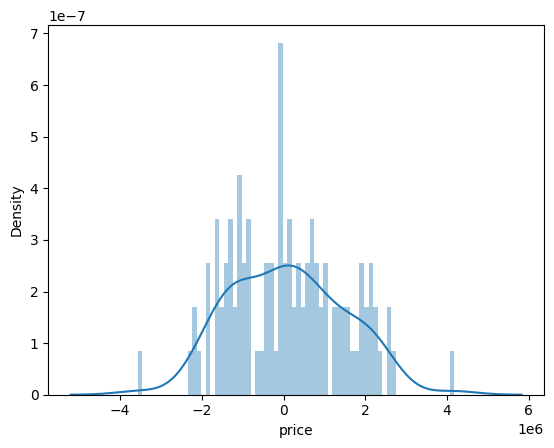

In [74]:
sns.distplot((y_test-y_pred),bins=70)

In [75]:
from sklearn.metrics import mean_absolute_error,r2_score

In [76]:
mean_absolute_error(y_test,y_pred)                  #calculating error

np.float64(1130193.52543629)

In [77]:
#implementing Lasso model
from sklearn.linear_model import Lasso
lasso_model=Lasso(alpha=60,max_iter=1000,tol=0.1)
lasso_model.fit(X_train,y_train)

Lasso(alpha=60, tol=0.1)

In [78]:
lasso_pred=lasso_model.predict(X_test)

In [79]:
mean_absolute_error(y_test,lasso_pred)

np.float64(1130306.6610324266)

In [80]:
#implementing ridge model
from sklearn.linear_model import Ridge
ridge_model=Ridge(alpha=60,max_iter=1000,tol=0.1)
ridge_model.fit(X_train,y_train)

Ridge(alpha=60, max_iter=1000, tol=0.1)

In [81]:
ridge_pred=ridge_model.predict(X_test)
mean_absolute_error(y_test,ridge_pred)

np.float64(1402730.3615305533)

In [82]:
r2=r2_score(y_test,y_pred)

In [83]:
r2

0.4436693707006749